## TSA - Data Processing and Visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

The dataset we will be using is a multi-variate time series having hourly data for approximately one year, for air quality in a significantly polluted Italian city.

It is necessary to make sure that - The time series is equally spaced, and There are no redundant values or gaps in it. 


In [2]:
data = pd.read_csv('./AirQualityUCI.csv')
data.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


In [3]:
data = pd.read_csv('./AirQualityUCI.csv', sep=';' , decimal=',')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [5]:
data.shape

(9471, 17)

We will drop the last 2 columns

In [6]:
data = data.iloc[:,:15]

In [7]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


For preprocessing the time series, we make sure there are no NaN(NULL) values in the dataset; if there are, we can replace them with either O or average or preceding or succeeding values. Replacing is a preferred choice over dropping so that the continuity of the time series is maintained. However, in our dataset the last few values seem to be NULL and hence dropping will not affect the continuity. 


In [8]:
data.isnull().mean()*100

Date             1.203674
Time             1.203674
CO(GT)           1.203674
PT08.S1(CO)      1.203674
NMHC(GT)         1.203674
C6H6(GT)         1.203674
PT08.S2(NMHC)    1.203674
NOx(GT)          1.203674
PT08.S3(NOx)     1.203674
NO2(GT)          1.203674
PT08.S4(NO2)     1.203674
PT08.S5(O3)      1.203674
T                1.203674
RH               1.203674
AH               1.203674
dtype: float64

In [9]:
data.dropna(inplace=True)

#### Converting to datetime object

In [10]:
data['DateTime'] = data.Date + ' '+ data.Time
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10/03/2004 18.00.00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10/03/2004 19.00.00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10/03/2004 20.00.00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10/03/2004 21.00.00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10/03/2004 22.00.00


In [11]:
data['DateTime'] = pd.to_datetime(data['DateTime'],format= '%d/%m/%Y %H.%M.%S')

#### Setting the new column as index

In [12]:
data.set_index('DateTime',inplace=True)

In [13]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [14]:
data.drop(columns=['Date','Time'], inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


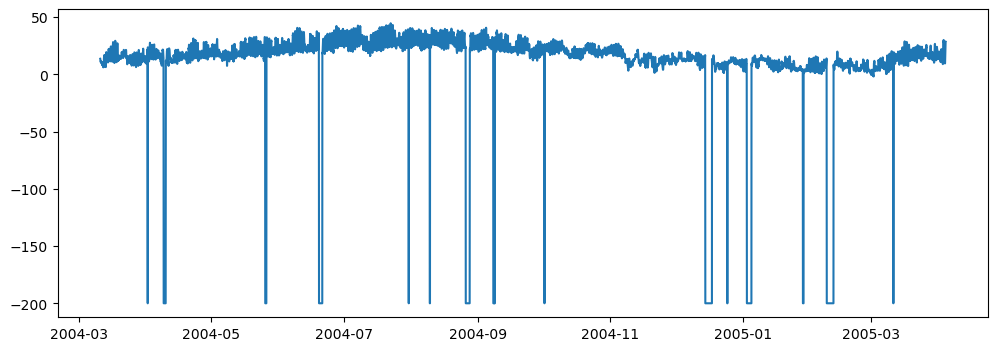

In [16]:
plt.figure(figsize=(12,4))
plt.plot(data['T'])
plt.show()

#### ARIMA Model

• An auto-regressive integrated moving-average models the value of a variable as a linear function of previous values and residual errors at previous time steps of a stationary timeseries.

However, the real world data may be non-stationary and have seasonality, thus Seasonal- ARIMA and Fractional-ARIMA were developed.

• ARIMA works on univariate time series, to handle multiple variables VARIMA was 
introduced. 


#### Lets consider only the 'T' variable

#### Data Preprocessing

In [17]:
data.dropna(inplace=True)

In [18]:
data.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [19]:
data.drop(columns=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','RH', 'AH'],inplace=True)

In [20]:
data.head()

,T
DateTime,
2004-03-10 18:00:00,13.6
2004-03-10 19:00:00,13.3
2004-03-10 20:00:00,11.9
2004-03-10 21:00:00,11.0
2004-03-10 22:00:00,11.2


#### Checking stationarity

In [21]:
data_adf = adfuller(data)

In [22]:
data_adf

(-10.953746484468166,
 8.666323734042241e-20,
 14,
 9342,
 {'1%': -3.431050181732143,
  '5%': -2.8618494362749733,
  '10%': -2.5669347078446885},
 73823.4860028697)

#### P value

In [23]:
data_adf[1]

8.666323734042241e-20

Since the p value is very low, we can reject the null hypothesis and conclude that the data is stationary.

In [24]:
stepwise_fit = auto_arima(data,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=74407.670, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=74273.231, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=74270.964, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=74405.670, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=74257.729, Time=3.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=11.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=74272.633, Time=1.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=74274.057, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=74255.729, Time=1.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=74268.964, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=74271.231, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=3.58 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AI

In [25]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9357
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -37124.865
Date:                Sat, 14 Oct 2023   AIC                          74255.729
Time:                        09:40:44   BIC                          74277.160
Sample:                    03-10-2004   HQIC                         74263.008
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8075      0.007    121.398      0.000       0.794       0.821
ma.L1         -0.8835      0.006   -143.137      0.000      -0.896      -0.871
sigma2       163.7308      0.244    671.537      0.000     163.253     164.209
===================================================================================
Ljung-Box (L1) (Q):                  27.93   Jarque-Bera (JB):          29559149.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                       278.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Splitting the data into training and testing

We will preserve the last 30 rows as the testing set and rest as our training set

In [26]:
train = data.iloc[:-30]
test = data.iloc[-30:]

In [27]:
train.shape

(9327, 1)

In [28]:
test.shape

(30, 1)

In [29]:
model = sm.tsa.arima.ARIMA(train, order = (1,1,1))

In [30]:
model = model.fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      T   No. Observations:                 9327
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -37020.162
Date:                Sat, 14 Oct 2023   AIC                          74046.323
Time:                        09:40:45   BIC                          74067.745
Sample:                    03-10-2004   HQIC                         74053.599
                         - 04-03-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8042      0.007    118.826      0.000       0.791       0.817
ma.L1         -0.8808      0.006   -139.931      0.000      -0.893      -0.868
sigma2       164.2267      0.245    670.377      0.000     163.747     164.707
===================================================================================
Ljung-Box (L1) (Q):                  27.26   Jarque-Bera (JB):          29285755.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                       277.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Prediction using test data

We need to provide the starting index and ending index

starting index will be the end of training index

In [32]:
start = len(train)
end = len(train)+len(test)-1

In [33]:
end

9356

In [34]:
start

9327

In [35]:
prediction = model.predict(start=start, end = end ,type = 'levels')

In [36]:
prediction

2005-04-03 09:00:00    13.417142
2005-04-03 10:00:00    13.350510
2005-04-03 11:00:00    13.296925
2005-04-03 12:00:00    13.253834
2005-04-03 13:00:00    13.219180
2005-04-03 14:00:00    13.191312
2005-04-03 15:00:00    13.168901
2005-04-03 16:00:00    13.150879
2005-04-03 17:00:00    13.136386
2005-04-03 18:00:00    13.124730
2005-04-03 19:00:00    13.115357
2005-04-03 20:00:00    13.107820
2005-04-03 21:00:00    13.101758
2005-04-03 22:00:00    13.096884
2005-04-03 23:00:00    13.092964
2005-04-04 00:00:00    13.089811
2005-04-04 01:00:00    13.087276
2005-04-04 02:00:00    13.085238
2005-04-04 03:00:00    13.083598
2005-04-04 04:00:00    13.082280
2005-04-04 05:00:00    13.081219
2005-04-04 06:00:00    13.080367
2005-04-04 07:00:00    13.079681
2005-04-04 08:00:00    13.079130
2005-04-04 09:00:00    13.078686
2005-04-04 10:00:00    13.078330
2005-04-04 11:00:00    13.078043
2005-04-04 12:00:00    13.077812
2005-04-04 13:00:00    13.077627
2005-04-04 14:00:00    13.077478
Freq: H, N

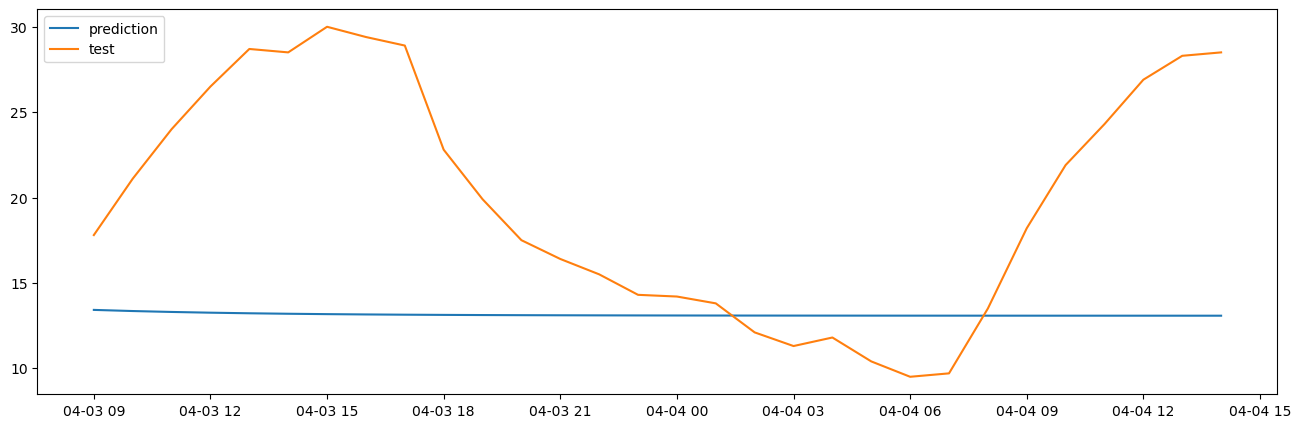

In [37]:
plt.figure(figsize=(16,5))
plt.plot(prediction)
plt.plot(test)
plt.legend(['prediction', 'test'])
plt.show()

In [38]:
mse = mean_squared_error(prediction, test)

In [39]:
rmse = np.sqrt(mse)

In [40]:
rmse

9.567133636620218

#### Re training the model on the entire dataset

In [42]:
model_02 = sm.tsa.arima.ARIMA(data, order=(1,1,1))

In [43]:
model_02 = model_02.fit()

In [44]:
data.tail()

,T
DateTime,
2005-04-04 10:00:00,21.9
2005-04-04 11:00:00,24.3
2005-04-04 12:00:00,26.9
2005-04-04 13:00:00,28.3
2005-04-04 14:00:00,28.5


#### Predicting  future dates after '2005-04-04'

#### Making the future date indices

In [45]:
index_future_dates = pd.date_range(start = "2005-04-05", end = '2005-05-04')

In [46]:
len(index_future_dates)

30

In [47]:
prediction_01 = model_02.predict(start = len(data),end = len(data)+30,typ = 'levels')

In [48]:
prediction_01

2005-04-04 15:00:00    27.776924
2005-04-04 16:00:00    27.193018
2005-04-04 17:00:00    26.721495
2005-04-04 18:00:00    26.340724
2005-04-04 19:00:00    26.033240
2005-04-04 20:00:00    25.784937
2005-04-04 21:00:00    25.584425
2005-04-04 22:00:00    25.422504
2005-04-04 23:00:00    25.291748
2005-04-05 00:00:00    25.186159
2005-04-05 01:00:00    25.100892
2005-04-05 02:00:00    25.032036
2005-04-05 03:00:00    24.976433
2005-04-05 04:00:00    24.931532
2005-04-05 05:00:00    24.895272
2005-04-05 06:00:00    24.865992
2005-04-05 07:00:00    24.842347
2005-04-05 08:00:00    24.823253
2005-04-05 09:00:00    24.807834
2005-04-05 10:00:00    24.795382
2005-04-05 11:00:00    24.785327
2005-04-05 12:00:00    24.777208
2005-04-05 13:00:00    24.770651
2005-04-05 14:00:00    24.765356
2005-04-05 15:00:00    24.761080
2005-04-05 16:00:00    24.757627
2005-04-05 17:00:00    24.754839
2005-04-05 18:00:00    24.752587
2005-04-05 19:00:00    24.750769
2005-04-05 20:00:00    24.749301
2005-04-05

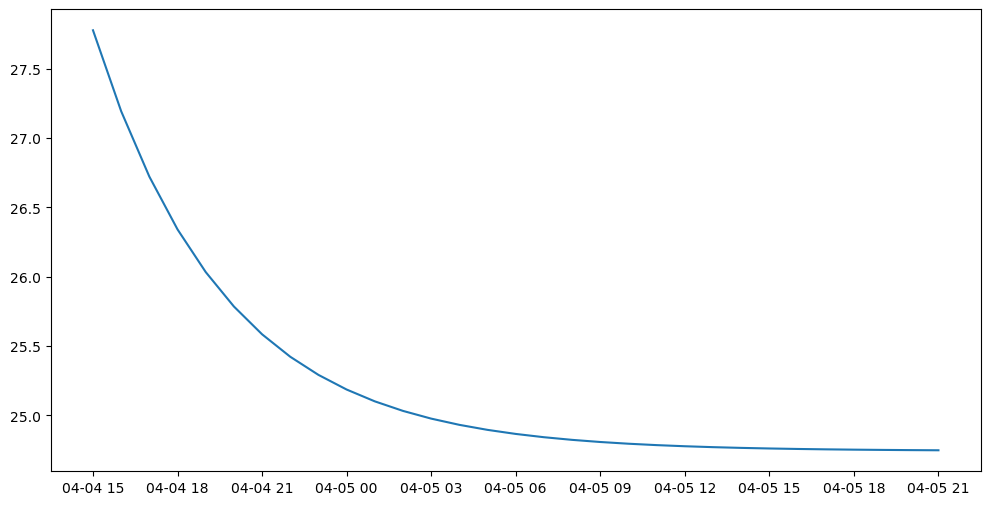

In [49]:
plt.figure(figsize=(12,6))
plt.plot(prediction_01)
plt.show()